
**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

**DATASET READING**

In [ ]:
df = pd.read_csv('./flight_delay.csv')

In [ ]:
df.shape

(675513, 5)

**DATA EXPLORATION**

In [ ]:
df

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0
...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0


In [ ]:
types = df.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 4
Depature Airport            object
Scheduled depature time     object
Destination Airport         object
Scheduled arrival time      object
Delay                      float64
dtype: object


**DATA PREPROCESSING**

In [ ]:
from sklearn import preprocessing
import datetime

In [ ]:
def count_nans(df):
    return pd.isna(df).sum().sum()

In [ ]:
print(count_nans(df))

0


In [ ]:
duration = pd.to_datetime(df['Scheduled arrival time']) - pd.to_datetime(df['Scheduled depature time'])

In [ ]:
df['Duration'] = duration.dt.seconds / 60

df.head(5)


,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0,785.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0,645.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0,770.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0,770.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0


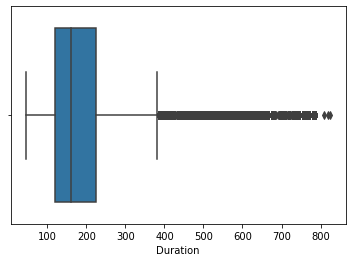

In [ ]:
import seaborn as sns
sns.boxplot(x = df['Duration'])

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df.loc[:, ['Duration']]))
threshold = 3
df.drop(df.index[np.where(z > threshold)[0]], inplace=True)

In [ ]:
df

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay,Duration
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0,145.0
5,HAM,2015-10-27 14:30:00,SVO,2015-10-27 17:15:00,0.0,165.0
7,DXB,2015-10-27 15:40:00,SVO,2015-10-27 21:20:00,1.0,340.0
8,SVO,2015-10-27 16:10:00,VVO,2015-10-28 00:35:00,0.0,505.0
9,TLV,2015-10-27 16:45:00,SVO,2015-10-27 20:55:00,0.0,250.0
...,...,...,...,...,...,...
675508,SVO,2018-08-31 23:50:00,SVX,2018-09-01 02:10:00,0.0,140.0
675509,LED,2018-08-31 23:50:00,SVO,2018-09-01 01:10:00,0.0,80.0
675510,SVO,2018-08-31 23:55:00,EGO,2018-09-01 01:20:00,0.0,85.0
675511,SVO,2018-08-31 23:55:00,TSE,2018-09-01 03:15:00,0.0,200.0


In [ ]:
df_train = df[pd.to_datetime(df['Scheduled depature time']).apply(lambda x:x.date()) < datetime.date(2018, 1, 1)]
df_test  = df[pd.to_datetime(df['Scheduled depature time']).apply(lambda x:x.date()) > datetime.date(2017, 12, 31)]

In [ ]:
x_train = df_train.drop('Delay', axis = 1)
x_test = df_test.drop('Delay', axis = 1)

y_train = df_train['Delay']
y_test = df_test['Delay']

type(x_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

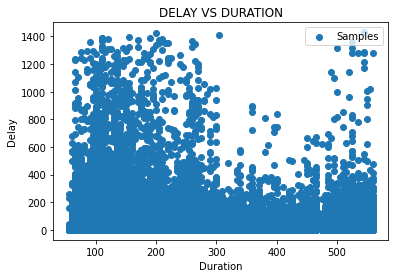

In [ ]:

x = x_train['Duration'].values
y = y_train.values



plt.scatter(x,y,label="Samples")
plt.title('DELAY VS DURATION')
plt.xlabel('Duration')
plt.ylabel('Delay')
plt.legend(loc="best")
plt.show()


x = x[:, np.newaxis]
y = y[:, np.newaxis]

X = x_test['Duration'].values
X = X[:, np.newaxis]

Y = y_test.values
Y = Y[:, np.newaxis]

LINEAR REGRESSION

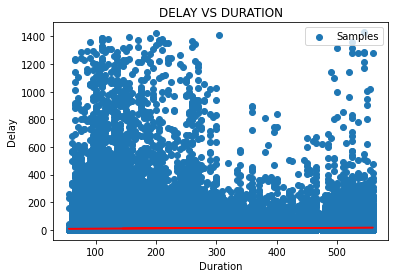

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x, y, label="Samples")
plt.title('DELAY VS DURATION')
plt.xlabel('Duration')
plt.ylabel('Delay')
plt.legend(loc="best")
plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
model.intercept_

array([7.98472941])

In [ ]:
y[:8000, 0].shape, y_pred.shape

((8000,), (8000,))

In [ ]:
pd.DataFrame({'Actual': y[:8000, 0], 'Predicted': y_pred}, index=[x for x in range(len(y_pred))])

,Actual,Predicted
0,0.0,3.640779
1,2.0,3.640779
2,0.0,3.640779
3,0.0,3.640779
4,9.0,3.640779
...,...,...
7995,2.0,3.640779
7996,0.0,3.640779
7997,0.0,3.640779
7998,9.0,3.640779


In [ ]:
r2_score(y[:8000, 0], y_pred)

-0.002788366634237427

POLYNOMIAL REGRESSION

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator



from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  

  X_train_poly = poly_features.fit_transform(x)
  

  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y)
  

  y_train_predicted = poly_model.predict(X_train_poly)
  

  y_test_predict = poly_model.predict(poly_features.fit_transform(X))
  

  rmse_train = np.sqrt(mean_squared_error(y, y_train_predicted))
  r2_train = r2_score(y, y_train_predicted)

  rmse_test = np.sqrt(mean_squared_error(Y, y_test_predict))
  r2_test = r2_score(Y, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))


create_polynomial_regression_model(degree=10)

The model performance for the training set
-------------------------------------------
RMSE of training set is 46.204105507567824
R2 score of training set is 0.001904771819981832


The model performance for the test set
-------------------------------------------
RMSE of test set is 39.6515358252226
R2 score of test set is -0.010448533929967807


In [ ]:
x[:1000].shape

(1000, 1)

[3.64077902] [[ 0.00000000e+00  6.22177947e-17 -3.66680580e-21  3.84057137e-21
   8.43410594e-19  1.45730861e-16  1.54626631e-14 -8.78678124e-17
   1.93248469e-19 -1.92223038e-22  7.21885752e-26]]
-0.04675155138579634


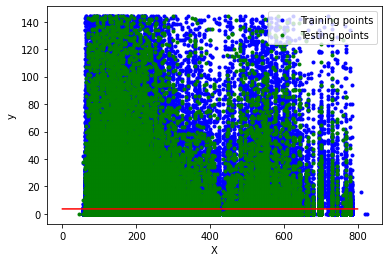

In [71]:
poly = PolynomialFeatures(degree=10, include_bias=True)
x_train_trans = poly.fit_transform(x[:8000])
x_test_trans = poly.transform(X)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y[:8000])

X_plotter = np.arange(0, 800, 0.1)
print(lr.intercept_, lr.coef_)
y_pred = lr.intercept_ + lr.coef_[0][1]*X_plotter + lr.coef_[0][2]*np.power(X_plotter, 2) + lr.coef_[0][3]*np.power(X_plotter, 3) + lr.coef_[0][4]*np.power(X_plotter, 4)
print(r2_score(Y[:8000], y_pred))

X_new_poly = poly.transform(x)
plt.plot(x, y, "b.",label='Training points')
plt.plot(X, Y, "g.",label='Testing points')
plt.plot(X_plotter, y_pred[:8000], '-r')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [80]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lp = lasso_reg.fit(x_train_trans, y[:8000])
lasso_reg.score(x_train_trans, y[:8000])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687701.0319407239, tolerance: 139520.0371875004
  positive)


0.014197654414266014

[3.36060036] [ 0.00000000e+00 -0.00000000e+00  1.28113350e-05  1.95631534e-08
  8.10254589e-12 -3.83955864e-15 -1.50662944e-17 -2.44592979e-20
 -3.16205395e-23 -3.66746457e-26 -4.00731054e-29]
-0.16224757138163315


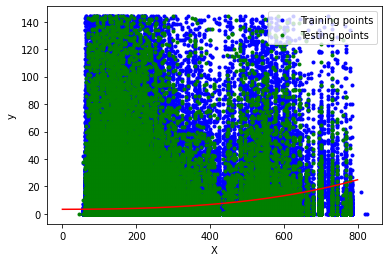

In [82]:
print(lp.intercept_, lp.coef_)
y_pred = lp.intercept_ + lp.coef_[1]*X_plotter + lp.coef_[2]*np.power(X_plotter, 2) + lp.coef_[3]*np.power(X_plotter, 3) + lp.coef_[4]*np.power(X_plotter, 4)
print(r2_score(Y[:8000], y_pred))

X_new_poly = poly.transform(x)
plt.plot(x, y, "b.",label='Training points')
plt.plot(X, Y, "g.",label='Testing points')
plt.plot(X_plotter, y_pred[:8000], '-r')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()